In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import spectrogram
from matplotlib import animation #necessite ffmpeg pour enregistrer les animations
% matplotlib inline

In [2]:
def dsp(theta, sigma2, T, N = 512):
    dsp_array = np.matrix(np.zeros((N, T)))
    
    f = np.arange(N, dtype = 'double')/N
    
    d = theta.shape[0]
    
    for t in np.arange(T):
        dsp_array[:,t] = np.matrix(sigma2/(2*np.pi*abs(fft(theta[:,t].T, N)) ** 2)).T
        
       
    return f, dsp_array

## Introduction

Ce notebook vise à présenter l'évolution d'un TVAR(2) en fonction du choix de T qui définit l'intervalle entre deux mesures du processus sur l'intervalle [0,1].

Rappelons que nous définissons le TVAR(2) comme suit $\forall t$ dans $[0,T]$:

\begin{equation}
X_{t,T} = a_1(\frac{t}{T})X_{t-1,T} + a_2(\frac{t}{T})X_{t-2,T} + \sigma(\frac{t}{T})\epsilon_{t,T}
\end{equation}

Avec $\epsilon_{t,T}$ un bruit blanc centré de variance 1.
Dans la suite, pour simplifier les expressions, on prendra $\sigma(u)=1$ sur $[0,1]$.

Les processus seront construits à partir des racines du polynôme associé. On cherche à illustrer l'influence des racines sur la DSP

## Premier exemple : racines réelles

Prenons le polynôme caractéristique avec $\forall u$ dans $[0,1]$:
    \begin{equation}
    A(z;u) = 1 - a_1(u) z - a_2(u) z^2
    \end{equation}

Pour le cas $p=2$, il est facile de choisir des coefficients pour le TVAR puisqu'on a les relations coefficients/racines suivantes lorsque l'on note $z_1$ et $z_2$ les inverse des racines du polynome $1-a_1z - a_2z^2$:
\begin{equation}
a_1 = z_1 + z_2
\end{equation}
\begin{equation}
a_2 = -z_1 z_2
\end{equation}

Donc en choisissant les racines variant au cours du temps $u$ dans $[0,1]$ $z_1(u) = \frac{1}{2 + u}$ et $z_2(u) = \frac{1}{5 + \sin(2 \pi u)}$ (on vérifie bien la condition que $|z| < 1$), on a les coefficients : 

\begin{equation}
a_1(u) = \frac{7 + u+ \sin(2\pi u)}{(2 + u)(5 +\sin(2 \pi u))}
\end{equation}
\begin{equation}
a_2(u) = \frac{-1}{(2 + u)(5 + \sin(2 \pi u))}
\end{equation}

In [3]:
epsilon = np.random.randn(int(2e4))

### T = 100

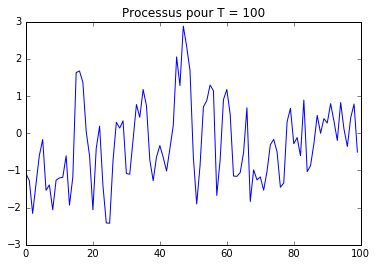

In [4]:
T = 100
X = epsilon
a_1 = np.zeros(2*T)
a_2 = np.zeros(2*T)

u = np.arange(T, dtype='double')/T

a_1[T:2*T] =  (7 + u + np.sin(2 * np.pi * u)) / ((2 + u) * (5 + np.sin(2 * np.pi * u)))
a_2[T:2*T] = - 1. / ((2 + u) * (5 + np.sin(2 * np.pi * u)))

    
X[0] = epsilon[0]
X[1] = epsilon[100]
    
for n in np.arange(2*T-2):
    X[n+2] = a_1[n+2]*X[n+1] + a_2[n+2]*X[n] + epsilon[(n+2)*100]
    
t = np.arange(2*T) - T #horizon des temps

plt.plot(t[T:2*T], X[T:2*T])
plt.title("Processus pour T = 100")

### T = 1000

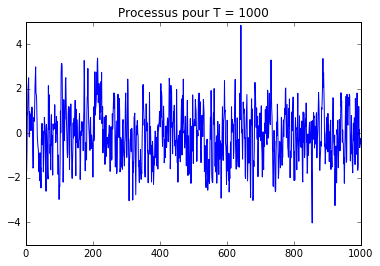

In [5]:
T = 1000
X = np.zeros(2*T)
a_1 = np.zeros(2*T)
a_2 = np.zeros(2*T)

u = np.arange(T, dtype='double')/T

a_1[T:2*T] =  (7 + u + np.sin(2 * np.pi * u)) / ((2 + u) * (5 + np.sin(2 * np.pi * u)))
a_2[T:2*T] = - 1. / ((2 + u) * (5 + np.sin(2 * np.pi * u)))
    
X[0] = epsilon[0]
X[1] = epsilon[10]
    
for n in np.arange(2*T-2):
    X[n+2] = a_1[n+2]*X[n+1] + a_2[n+2]*X[n] + epsilon[(n+2)*10]
    
t = np.arange(2*T) - T #horizon des temps

plt.plot(t[T:2*T], X[T:2*T])
plt.title("Processus pour T = 1000")

### T = 10000

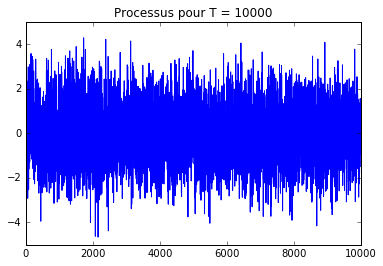

In [6]:
T = 10000
X = np.zeros(2*T)
a_1 = np.zeros(2*T)
a_2 = np.zeros(2*T)

u = np.arange(T, dtype='double')/T

a_1[T:2*T] =  (7 + u + np.sin(2 * np.pi * u)) / ((2 + u) * (5 + np.sin(2 * np.pi * u)))
a_2[T:2*T] = - 1. / ((2 + u) * (5 + np.sin(2 * np.pi * u)))
    
X[0] = epsilon[0]
X[1] = epsilon[1]
    
for n in np.arange(2*T-2):
    X[n+2] = a_1[n+2]*X[n+1] + a_2[n+2]*X[n] + epsilon[n+2]
    
t = np.arange(2*T) - T #horizon des temps

plt.plot(t[T:2*T], X[T:2*T])
plt.title("Processus pour T = 10000")

## Deuxième exemple : racines complexes conjuguées 

On s'intéresse maintenant au cas où les racines que l'on recherche sont complexes conjuguées.

Si on note $r = r_1 + ir_2$ l'inverse de l'une des deux racines, on a par les relations coefficients/racines que:
\begin{equation}
a_1 = 2Re(r)
\end{equation}
\begin{equation}
a_2 = -|r|^2
\end{equation}

### Premier cas : module constant, phase variable

On prend :
$$
r(u) = \rho e^{i\phi(u)}, \, 0 < \rho < 1, \phi(u) \in [-\pi,\pi[
$$
ce qui donne :
$$
a_1 = 2 \rho \cos(\phi(u))
$$
$$
a_2 = - \rho^2
$$

#### Construction pour T=1000

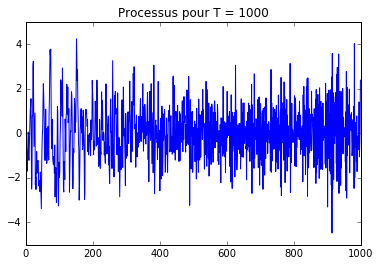

In [7]:
T = 1000
epsilon = np.random.randn(2*T)
X = np.zeros(2*T)
a_1 = np.zeros(2*T)
a_2 = np.zeros(2*T)

u = np.arange(T, dtype='double')/T

rho = 0.5
phase = u/2
phi = 2*np.pi*phase

a_1[T:2*T] = 2*rho*np.cos(phi)
a_2[T:2*T] = -rho**2


X[0] = epsilon[0]
X[1] = epsilon[1]
    
for n in np.arange(2*T-2):
    X[n+2] = a_1[n+2]*X[n+1] + a_2[n+2]*X[n] + epsilon[n+2]
    
t = np.arange(2*T) - T #horizon des temps

plt.plot(t[T:2*T], X[T:2*T])
plt.title("Processus pour T = 1000")

#### Analyse spectrale

C:\Users\Amaury\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


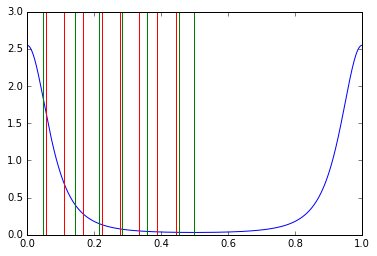

In [8]:
# Analyse spectrale
Nfft = 2**10
sigma2 = 1.
Theta = np.concatenate((np.ones((1,T)),-a_1[T:2*T].reshape(1,T),-a_2[T:2*T].reshape(1,T)),axis=0)
freq, dsp_array = dsp(Theta,sigma2,T,Nfft)

freq = freq.reshape(Nfft,)

plt.figure()
plt.plot(freq, dsp_array[:,0:100:T])

for t in np.linspace(0,T-1,T/100):
    plt.axvline(x=phase[t], ymin=0, ymax=1, linewidth=1, color = 'r')
    plt.axvline(x=freq[np.argmax(dsp_array[0:Nfft/2,t])], ymin=0, ymax=1, linewidth=1, color = 'g')

    
plt.show()

(1024, 1000) (513, 11)


C:\Users\Amaury\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in arccos


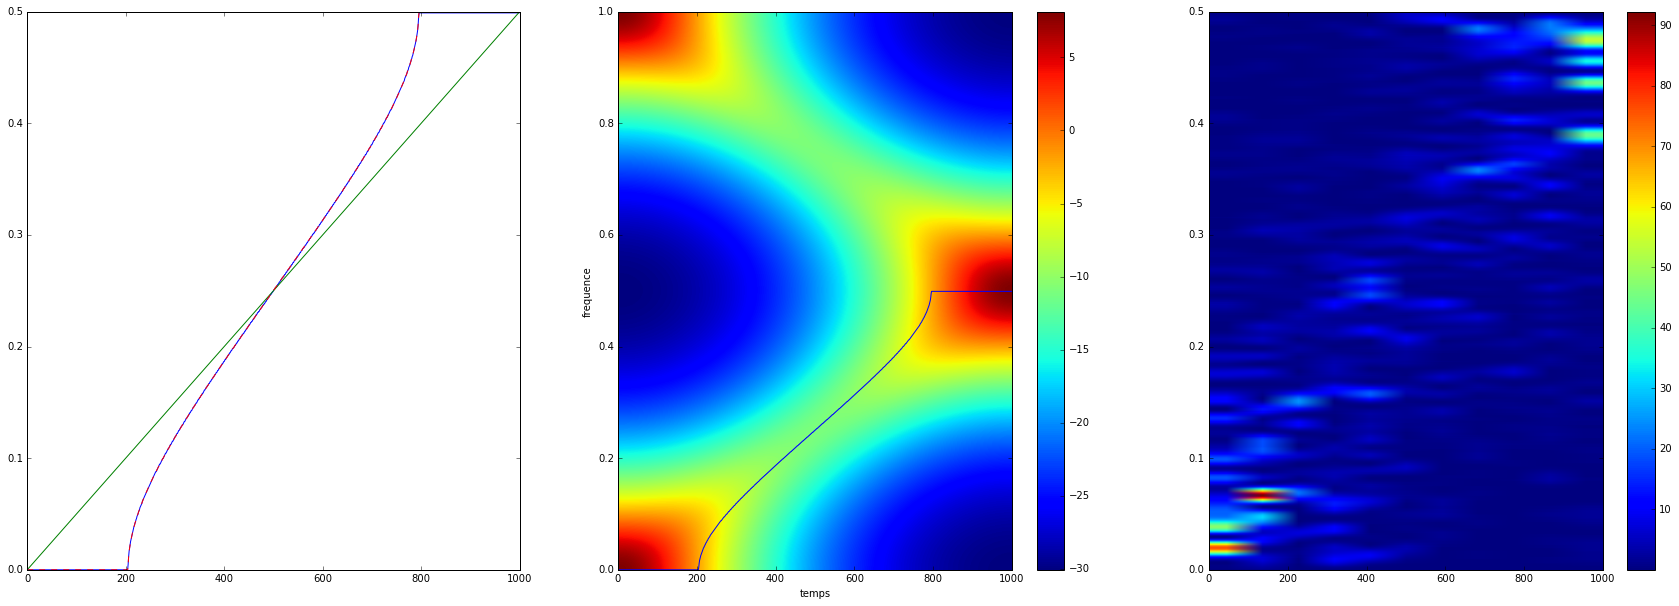

In [23]:

max_pos = np.zeros(T)
for t in np.arange(T):
    #dsp_array[:,t] = dsp_array[:,t] / np.max(dsp_array[:,t])
    max_pos[t] = np.argmax(dsp_array[0:Nfft/2,t])

    
def max_theo(rho,phi):
    cas1 = (phi >= np.arccos(2*rho/(1+rho**2))) & (phi <= np.arccos(-2*rho/(1+rho**2)))
    cas2 = phi > np.arccos(-2*rho/(1+rho**2))
    val1 = cas1*np.arccos((1+rho**2)/(2*rho)*np.cos(phi))
    val2 = cas2*np.pi
    val1[np.isnan(val1)]=0
    return ((val1+val2)/(2*np.pi))
        
f,ax = plt.subplots(1,3,figsize=(30,10))    
ax[0].plot(max_pos / Nfft)
ax[0].plot(phase)
ax[0].plot(max_theo(rho,phi),'r--')
    
im=ax[1].imshow(20*np.log10(dsp_array),origin="lower", aspect="auto",extent=[0,T-1,0,1])
plt.colorbar(im,ax=ax[1])
ax[1].set_xlabel("temps")
ax[1].set_ylabel("frequence")
ax[1].plot(max_pos / Nfft)


f,t,spec = spectrogram(X[T:],nfft=Nfft,nperseg=T/10)

print(dsp_array.shape, spec.shape)

#for k in np.arange(len(t)):
#    spec[:,k] = spec[:,k] / np.max(spec[:,k])
im2=ax[2].imshow(spec,origin="lower", aspect="auto",extent=[0,T-1,0,0.5])
plt.colorbar(im2,ax=ax[2])




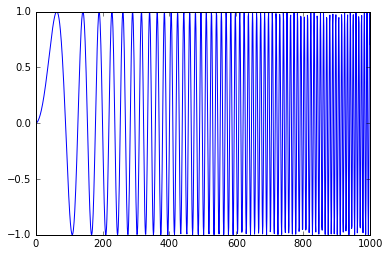

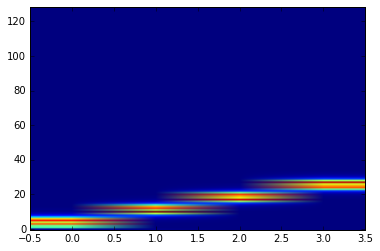

In [10]:
from scipy.signal import spectrogram
T = 1000;
time = np.arange(T);
freq = time/2
x = np.sin(2*np.pi*freq/8000*time);
f,t,spec = spectrogram(x,Nfft)
plt.plot(x)
plt.figure()
plt.imshow(spec,origin="lower", aspect="auto")


# Exemple du TVAR(1)
Le polynôme est $1 - a(u)z$. 
$a(u)$ étant l'inverse de la racine. On prend $a(u)=\rho(u) e^{i\phi(u)}$

## Cas où $\phi$ est constant

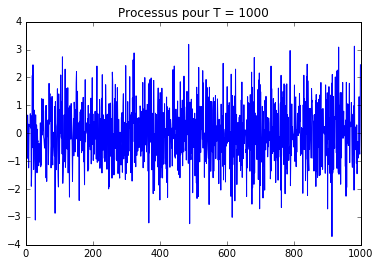

In [25]:
T = 1000
X = np.zeros(2*T, dtype='complex')
a = np.zeros(2*T, dtype='complex')

u = np.arange(T, dtype='double')/T

rho = 1-np.exp(-u)
phase = 0.5
phi = 2.*np.pi*phase

a[T:2*T] = rho*np.exp(1j*phi)

X[0] = epsilon[0]
    
for n in np.arange(2*T-1):
    X[n+1] = a[n+1]*X[n] + epsilon[n+1]
    
t = np.arange(2*T) - T #horizon des temps

plt.plot(t[T:2*T], np.real(X[T:2*T]))
plt.title("Processus pour T = 1000")

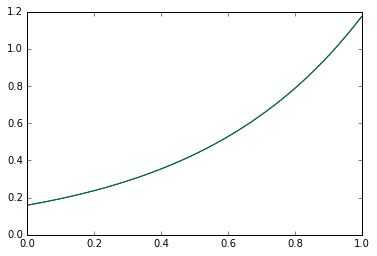

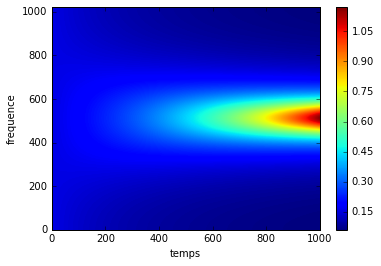

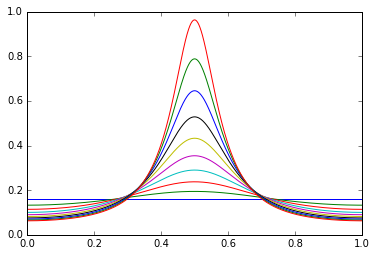

In [26]:
# Analyse spectrale
Nfft = 2**10
sigma2 = 1.
Theta = np.concatenate((np.ones((1,T),dtype='complex'),-a[T:2*T].reshape(1,T)),axis=0)
freq, dsp_array = dsp(Theta,sigma2,T,Nfft)

freq = freq.reshape(Nfft,1)

max_val = np.zeros(T)
for t in np.arange(T):
    max_val[t] = np.max(dsp_array[:,t])

    
plt.figure()
plt.plot(u, max_val)
plt.plot(u, sigma2/(2*np.pi*(1-rho)**2))
#plt.ylim(0,1)

plt.figure()
plt.imshow(dsp_array,origin="lower", aspect="auto")
plt.colorbar()

plt.xlabel("temps")
plt.ylabel("frequence")

plt.figure()
plt.plot(freq, dsp_array[:,0::100])

plt.show()

C:\Users\Amaury\Anaconda3\lib\site-packages\matplotlib\axis.py:1015: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


KeyboardInterrupt: 

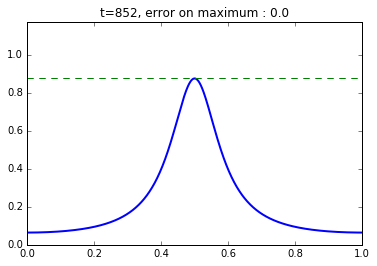

In [27]:
### Animation 
# Definition de la figure et des axes
fig = plt.figure()
ax = plt.axes(xlim=(0,1), ylim = (0,np.max(dsp_array)))
line, = ax.plot([], [], lw=2)
max_theo, = ax.plot([],[],'r--',lw=1) 
maximum, = ax.plot([],[],'g--',lw=1) 


# Fonction d'initialisation : affiche le fond à chaque étape
def init():
    line.set_data([], [])
    max_theo.set_data([],[])
    maximum.set_data([],[])
    return line, max_theo, maximum

# Fonction d'animation
def animate(t):
    line.set_data(freq, dsp_array[:,t])
    max_theo_val = sigma2/(2*np.pi*(1-rho[t])**2)
    max_theo.set_data([0,1],[max_theo_val,max_theo_val])  
    maximum.set_data([0,1],[max_val[t],max_val[t]])    
    ax.set_title("t=%d, error on maximum : %s"%(t, abs(max_theo_val - max_val[t])))
    return line, max_theo, maximum

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=T, interval=10, blit=True)

anim.save('TVAR1_racine_module.mp4',fps=30,extra_args=['-vcodec', 'libx264'])

## Cas où $\rho$ est constante

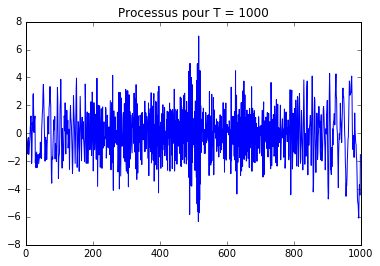

In [28]:
T = 1000
X = np.zeros(2*T, dtype='complex')
a = np.zeros(2*T, dtype='complex')

u = np.arange(T, dtype='double')/T

rho = 0.9
phase = u
phi = 2.*np.pi*phase

a[T:2*T] = rho*np.exp(1j*phi)

X[0] = epsilon[0]
    
for n in np.arange(2*T-1):
    X[n+1] = a[n+1]*X[n] + epsilon[n+1]
    
t = np.arange(2*T) - T #horizon des temps

plt.plot(t[T:2*T], np.real(X[T:2*T]))
plt.title("Processus pour T = 1000")

[ 0.          0.00097656  0.00195312 ..., -0.00292969 -0.00195312
 -0.00097656]


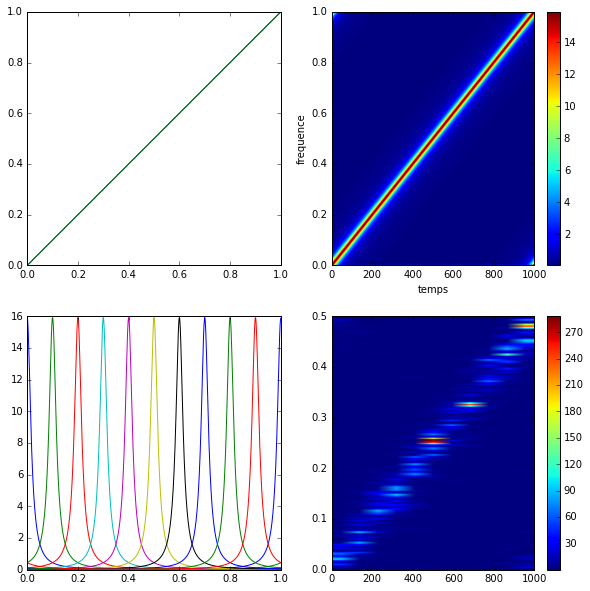

In [38]:
# Analyse spectrale
Nfft = 2**10
sigma2 = 1.
Theta = np.concatenate((np.ones((1,T),dtype='complex'),-a[T:2*T].reshape(1,T)),axis=0)
freq, dsp_array = dsp(Theta,sigma2,T,Nfft)

freq = freq.reshape(Nfft,1)

max_pos = np.zeros(T)
for t in np.arange(T):
    max_pos[t] = freq[np.argmax(dsp_array[:,t])]


f,ax = plt.subplots(2,2,figsize=(10,10))    
ax[0,0].plot(u, max_pos)
ax[0,0].plot(u, phase)
ax[0,0].set_ylim(0,1)
    
im=ax[0,1].imshow(dsp_array,origin="lower", aspect="auto",extent=[0,T-1,0,1])
plt.colorbar(im,ax=ax[0,1])
ax[0,1].set_xlabel("temps")
ax[0,1].set_ylabel("frequence")
ax[0,1].plot(max_pos / Nfft)    


ax[1,0].plot(freq, dsp_array[:,0::100])


f,t,spec = spectrogram(X[T:],nfft=Nfft,nperseg=T/10)
im2=ax[1,1].imshow(spec,origin="lower", aspect="auto",extent=[0,T-1,0,0.5])
plt.colorbar(im2,ax=ax[1,1])

print(f)
plt.show()

In [ ]:
### Animation 
# Definition de la figure et des axes
fig = plt.figure()
ax = plt.axes(xlim=(0,1), ylim = (0,np.max(dsp_array)))
line, = ax.plot([], [], lw=2)
max_theo, = ax.plot([],[],'r--',lw=1) 
maximum, = ax.plot([],[],'g--',lw=1) 


# Fonction d'initialisation : affiche le fond à chaque étape
def init():
    line.set_data([], [])
    max_theo.set_data([],[])
    maximum.set_data([],[])
    return line, max_theo, maximum

# Fonction d'animation
def animate(t):
    line.set_data(freq, dsp_array[:,t])
    max_theo.set_data([phase[t],phase[t]],[0, np.max(dsp_array[:,t])])  
    maximum.set_data([max_pos[t],max_pos[t]],[0,np.max(dsp_array[:,t])])    
    ax.set_title("t=%d, error on maximum : %s"%(t, abs(phase[t] - max_pos[t])))
    return line, max_theo, maximum

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=T, interval=10, blit=True)

anim.save('TVAR1_racine_phase.mp4',fps=30,extra_args=['-vcodec', 'libx264'])

# Test AR(2)

In [ ]:
T = 1000
epsilon = np.random.randn(T)

X = np.zeros(T)

rho = 0.5
phase = 1./8
phi = 2*np.pi*phase

a_1 = 2*rho*np.cos(phi)
a_2 = -rho**2

X[0] = epsilon[0]
X[1] = epsilon[1]
    
for n in np.arange(T-2):
    X[n+2] = a_1*X[n+1] + a_2*X[n] + epsilon[n+2]
    
t = np.arange(T) #horizon des temps

plt.plot(t, X)
plt.title("Processus pour T = 1000")

In [ ]:
# Analyse spectrale
Nfft = 2**10
sigma2 = 1.
Theta = np.array([1,-a_1,-a_2])

dsp_array = np.matrix(sigma2/(2*np.pi*abs(fft(Theta, Nfft)) ** 2)).T
freq = np.arange(Nfft,dtype='double')/Nfft

plt.figure()
plt.plot(freq, dsp_array)


max_pos = freq[np.argmax(dsp_array[0:Nfft/2])]
plt.axvline(x=phase, ymin=0, ymax=1, linewidth=1, color = 'r')
plt.axvline(x=max_pos, ymin=0, ymax=1, linewidth=1, color = 'g')

print('fréquence du max = %s, fréquence inverse racine = %s'%(max_pos,phase))
print('valeur à lambda = phi : %s, valeur théorique : %s'
      %(dsp_array[np.where(freq == phase)], 16./(2*np.pi*5))) 
print('valeur à lambda = 0 : %s, valeur théorique : %s' 
      %(dsp_array[0], 16./(2*np.pi*(5-2*np.sqrt(2))**2)))
plt.show()